### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


## Question 1

In [37]:
# <1> 
# Import libraries

#(Write code here)
import pandas as pd
import os
import matplotlib.pyplot as plt


## Question 2

In [2]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)
os.getcwd()

'/content'

## Question 3

In [3]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)
curr_dir_contents = os.listdir()
prnt_dir_contents = os.listdir('../')
print(curr_dir_contents)
print(prnt_dir_contents)


['.config', '.ipynb_checkpoints', 'CollegeScorecard_Raw_Data', 'sample_data']
['lib', 'sys', 'bin', 'tmp', 'srv', 'etc', 'root', 'boot', 'proc', 'mnt', 'var', 'lib64', 'home', 'dev', 'sbin', 'run', 'media', 'opt', 'usr', 'content', '.dockerenv', 'datalab', 'tools', 'swift', 'tensorflow-1.15.2', 'lib32']


## Question 4

In [12]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

#(Write code here)
data_dir = os.listdir('CollegeScorecard_Raw_Data')
data_dir = [f for f in data_dir if 'MERGED' == f[0:6] and 'csv' == f[-3:]]
print(data_dir)

['MERGED1998_99_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2018_19_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED2015_16_PP.csv']


## Question 5

In [16]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

#(Write code here)

empty_list = []

for file_csv in data_dir:
  df_ind = pd.read_csv(file_csv, usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
  df_ind['YEAR'] = file_csv[6:10]
  empty_list.append(df_ind)

In [18]:
# view first dataframe
empty_list[1].head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0,NaN,NaN,2006
1,100654,Alabama A & M University,AL,5,0.4118,3640.0,2006
2,100663,University of Alabama at Birmingham,AL,5,0.8778,4792.0,2006
3,100690,Amridge University,AL,5,NaN,6000.0,2006
4,100706,University of Alabama in Huntsville,AL,5,0.8834,4848.0,2006


In [22]:
# concatenate multiple dataframes into a single one
df = pd.concat(empty_list)
df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100654,Alabama A & M University,AL,5,NaN,NaN,1998
1,100663,University of Alabama at Birmingham,AL,5,NaN,NaN,1998
2,100690,Amridge University,AL,5,NaN,NaN,1998
3,100706,University of Alabama in Huntsville,AL,5,NaN,NaN,1998
4,100724,Alabama State University,AL,5,NaN,NaN,1998


## Question 6

In [23]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
df.head(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100654,Alabama A & M University,AL,5,NaN,NaN,1998
1,100663,University of Alabama at Birmingham,AL,5,NaN,NaN,1998
2,100690,Amridge University,AL,5,NaN,NaN,1998
3,100706,University of Alabama in Huntsville,AL,5,NaN,NaN,1998
4,100724,Alabama State University,AL,5,NaN,NaN,1998
5,100751,The University of Alabama,AL,5,NaN,NaN,1998
6,100760,Central Alabama Community College,AL,5,NaN,NaN,1998
7,100812,Athens State University,AL,5,NaN,NaN,1998
8,100830,Auburn University at Montgomery,AL,5,NaN,NaN,1998
9,100858,Auburn University,AL,5,NaN,NaN,1998


In [24]:
# how many rows and columns are in the dataframe
df.shape

(108631, 7)

In [25]:
# look at the last few rows
df.tail(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
3742,229036,Brightwood College-Houston,TX,6,NaN,NaN,2015
3743,229063,Texas Southern University,TX,6,0.5090,8726.0,2015
3744,229115,Texas Tech University,TX,6,0.6306,8028.0,2015
3745,229160,Texas Wesleyan University,TX,6,0.4595,24454.0,2015
3746,229179,Texas Woman's University,TX,6,0.8592,6948.0,2015
3747,229267,Trinity University,TX,6,0.4803,37856.0,2015
3748,229300,The University of Texas Health Science Center ...,TX,6,NaN,NaN,2015
3749,229337,Texas Tech University Health Sciences Center,TX,6,NaN,NaN,2015
3750,229355,Tyler Junior College,TX,6,NaN,2410.0,2015
3751,229416,Universal Technical Institute of Texas Inc.,TX,6,NaN,NaN,2015


In [26]:
# look at random sample
df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2648,184612,Felician University,NJ,2,0.6294,12450.0,2002
1192,141121,Swainsboro Technical College,GA,5,NaN,NaN,1997
2296,181756,Vatterott College-Spring Valley,NE,4,NaN,11849.0,2011
1717,166683,Massachusetts Institute of Technology,MA,1,0.0788,45016.0,2014
436,118453,Marinello School of Beauty,CA,8,NaN,NaN,2008


In [27]:
df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.086310e+05,108631.000000,31528.000000,55529.000000
mean,4.156003e+05,4.300761,0.680557,11949.628753
std,2.683024e+06,2.157496,0.213002,10895.561734
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.465285e+05,2.000000,0.551375,3360.000000
50%,1.803280e+05,4.000000,0.705700,8414.000000
75%,2.125770e+05,5.000000,0.833300,17170.000000
max,4.914640e+07,9.000000,1.000000,74514.000000


## Question 7

In [28]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
df_bc = df[df['INSTNM'] == 'University of Maryland-Baltimore County']

In [29]:
df_bc

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1982,163268,University of Maryland-Baltimore County,MD,2,NaN,NaN,1998
1799,163268,University of Maryland-Baltimore County,MD,2,0.7153,8622.0,2006
1779,163268,University of Maryland-Baltimore County,MD,2,0.6895,8708.0,2007
1873,163268,University of Maryland-Baltimore County,MD,2,0.5757,7388.0,2003
1745,163268,University of Maryland-Baltimore County,MD,2,0.6890,8872.0,2009
1510,163268,University of Maryland-Baltimore County,MD,2,0.5683,11264.0,2016
1915,163268,University of Maryland-Baltimore County,MD,2,0.6551,5910.0,2001
1478,163268,University of Maryland-Baltimore County,MD,2,0.6021,11518.0,2017
1893,163268,University of Maryland-Baltimore County,MD,2,0.6327,6362.0,2002
1629,163268,University of Maryland-Baltimore County,MD,2,0.6315,10068.0,2013


## Question 8

In [ ]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)

In [31]:
# number of observations
df_bc.shape

(23, 7)

In [32]:
df_bc.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1982,163268,University of Maryland-Baltimore County,MD,2,NaN,NaN,1998
1799,163268,University of Maryland-Baltimore County,MD,2,0.7153,8622.0,2006
1779,163268,University of Maryland-Baltimore County,MD,2,0.6895,8708.0,2007
1873,163268,University of Maryland-Baltimore County,MD,2,0.5757,7388.0,2003
1745,163268,University of Maryland-Baltimore County,MD,2,0.6890,8872.0,2009


In [33]:
df_bc.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1660,163268,University of Maryland-Baltimore County,MD,2,0.6035,9764.0,2012
2049,163268,University of Maryland-Baltimore County,MD,2,NaN,NaN,1997
1819,163268,University of Maryland-Baltimore County,MD,2,0.7143,8520.0,2005
2151,163268,University of Maryland-Baltimore County,MD,2,NaN,NaN,1996
1555,163268,University of Maryland-Baltimore County,MD,2,0.5942,11006.0,2015


In [35]:
df_bc.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1510,163268,University of Maryland-Baltimore County,MD,2,0.5683,11264.0,2016
1982,163268,University of Maryland-Baltimore County,MD,2,NaN,NaN,1998
1745,163268,University of Maryland-Baltimore County,MD,2,0.6890,8872.0,2009
1478,163268,University of Maryland-Baltimore County,MD,2,0.6021,11518.0,2017
1819,163268,University of Maryland-Baltimore County,MD,2,0.7143,8520.0,2005


In [36]:
df_bc.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


## Question 9

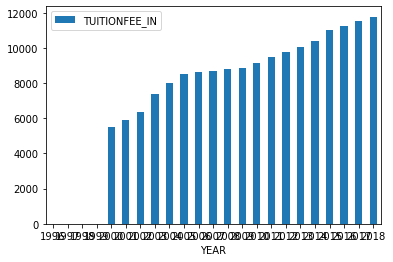

In [40]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

#(Write code here)
df_bc = df_bc.sort_values('YEAR')
ax = df_bc.plot.bar(x='YEAR', y='TUITIONFEE_IN',rot=0)

## Question 10

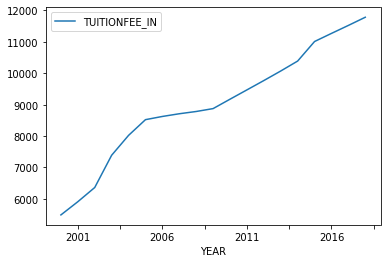

In [42]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)
ay = df_bc.plot.line(x='YEAR',y='TUITIONFEE_IN',rot=0)

## Question 11

In [66]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)
list_tution_bc = df_bc['TUITIONFEE_IN'].to_list()

In [67]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)
import math

pct_inc = []
prev_val = None
for val in list_tution_bc:
  if math.isnan(val):
    pct_inc.append(0.0)
  else:
    if math.isnan(prev_val) or prev_val is None:
      pct_inc.append(0.0)
    else:
      pct = float(val - prev_val) / float(prev_val)
      pct_inc.append(pct)
  prev_val = val
print(list_tution_bc)
print(pct_inc)

[nan, nan, nan, nan, 5490.0, 5910.0, 6362.0, 7388.0, 8020.0, 8520.0, 8622.0, 8708.0, 8780.0, 8872.0, 9171.0, 9467.0, 9764.0, 10068.0, 10384.0, 11006.0, 11264.0, 11518.0, 11778.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.07650273224043716, 0.07648054145516074, 0.16127004086765168, 0.08554412560909583, 0.06234413965087282, 0.011971830985915493, 0.009974483878450475, 0.008268259072117593, 0.010478359908883827, 0.03370153291253381, 0.03227565151019518, 0.03137213478398648, 0.031134780827529702, 0.03138657131505761, 0.05989984591679507, 0.02344175904052335, 0.022549715909090908, 0.022573363431151242]


In [57]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)
pct_inc_round = [round(elem,2) for elem in pct_inc]

In [55]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)
df_bc['PCT_CHANGE'] = pct_inc_round
df_bc.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
1610,163268,University of Maryland-Baltimore County,MD,2,0.5961,10384.0,2014,0.03
1555,163268,University of Maryland-Baltimore County,MD,2,0.5942,11006.0,2015,0.06
1510,163268,University of Maryland-Baltimore County,MD,2,0.5683,11264.0,2016,0.02
1478,163268,University of Maryland-Baltimore County,MD,2,0.6021,11518.0,2017,0.02
1415,163268,University of Maryland-Baltimore County,MD,2,0.5794,11778.0,2018,0.02


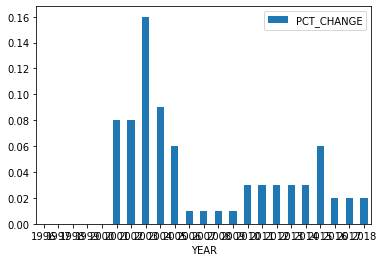

In [58]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)
ax_1 = pct_inc_round = df_bc.plot.bar(x='YEAR', y='PCT_CHANGE',rot=0)


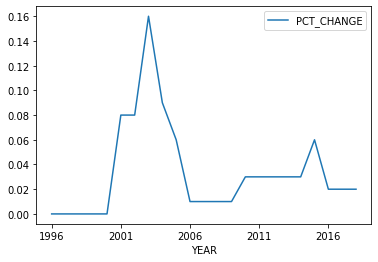

In [59]:
ay_1 = pct_inc_round = df_bc.plot.line(x='YEAR', y='PCT_CHANGE',rot=0)

## Question 12

In [79]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)
def per_change(df_name):

  tuition_list = df_name['TUITIONFEE_IN'].to_list()

  pct_inc = []
  prev_val = None
  for val in tuition_list:
    if math.isnan(val):
      pct_inc.append(0.0)
    else:
      if math.isnan(prev_val) or prev_val is None:
        pct_inc.append(0.0)
      else:
        pct = float(val - prev_val) / float(prev_val)
        pct_inc.append(pct)
    prev_val = val
  
  # round list
  pct_inc_round = [round(elem,2) for elem in pct_inc]

  # add to dataframe
  df_name['PCT_CHANGE'] = pct_inc_round
  
  return df_name

 

In [81]:
ex = per_change(df_bc)
ex.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
1610,163268,University of Maryland-Baltimore County,MD,2,0.5961,10384.0,2014,0.03
1555,163268,University of Maryland-Baltimore County,MD,2,0.5942,11006.0,2015,0.06
1510,163268,University of Maryland-Baltimore County,MD,2,0.5683,11264.0,2016,0.02
1478,163268,University of Maryland-Baltimore County,MD,2,0.6021,11518.0,2017,0.02
1415,163268,University of Maryland-Baltimore County,MD,2,0.5794,11778.0,2018,0.02


## Question 13

In [84]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
df_jh = df.loc[df['INSTNM'] == 'Johns Hopkins University']
df_jh.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1772,162928,Johns Hopkins University,MD,2,0.2571,35900.0,2007
1906,162928,Johns Hopkins University,MD,2,0.3431,26210.0,2001
1653,162928,Johns Hopkins University,MD,2,0.1843,43390.0,2012
1884,162928,Johns Hopkins University,MD,2,0.3506,27390.0,2002
2139,162928,Johns Hopkins University,MD,2,NaN,NaN,1996


## Question 14

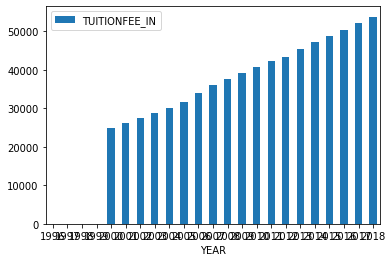

In [85]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)
df_jh = df_jh.sort_values('YEAR')
ax = df_jh.plot.bar(x='YEAR', y='TUITIONFEE_IN',rot=0)


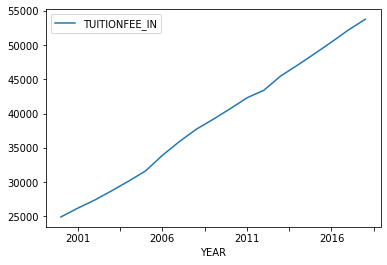

In [86]:
ay = df_jh.plot.line(x='YEAR', y='TUITIONFEE_IN',rot=0)

## Question 15

In [89]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)

df_jh = per_change(df_jh)

## Question 16

In [90]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)

print('Already done in function!')

Already done in function!


## Question 17

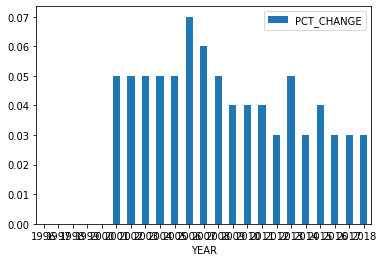

In [91]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)
ax = df_jh.plot.bar(x='YEAR', y='PCT_CHANGE',rot=0)


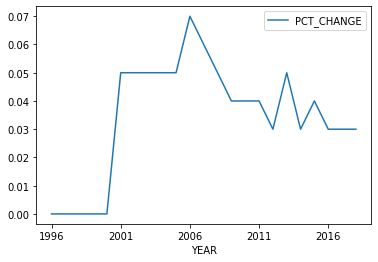

In [92]:
ay = df_jh.plot.line(x='YEAR', y='PCT_CHANGE',rot=0)

## Question 18

In [97]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)

umbc2 = df_bc[['YEAR','PCT_CHANGE']]
umbc2 = umbc2.rename(columns={'PCT_CHANGE':'UMBC_PCT'})
umbc2.head()

,YEAR,UMBC_PCT
2151,1996,0.0
2049,1997,0.0
1982,1998,0.0
1955,1999,0.0
1926,2000,0.0


In [99]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)
jhu2 = df_jh[['YEAR','PCT_CHANGE']]
jhu2 = jhu2.rename(columns={'PCT_CHANGE':'JHU_PCT'})
jhu2.head()


,YEAR,JHU_PCT
2139,1996,0.0
2039,1997,0.0
1973,1998,0.0
1946,1999,0.0
1917,2000,0.0


In [102]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)
df_combine = pd.merge(umbc2, jhu2, on = 'YEAR')
df_combine.sample(5)

,YEAR,UMBC_PCT,JHU_PCT
13,2009,0.01,0.04
1,1997,0.00,0.00
10,2006,0.01,0.07
18,2014,0.03,0.03
17,2013,0.03,0.05


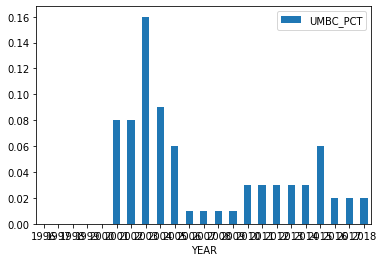

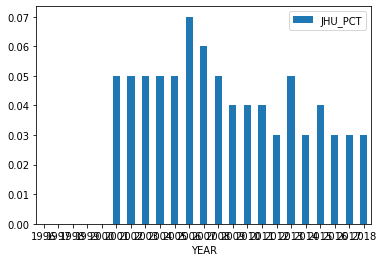

In [104]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)

ax_umbc = df_combine.plot.bar(x='YEAR', y='UMBC_PCT',rot=0)
ax_jhu = df_combine.plot.bar(x='YEAR', y='JHU_PCT', rot = 0)

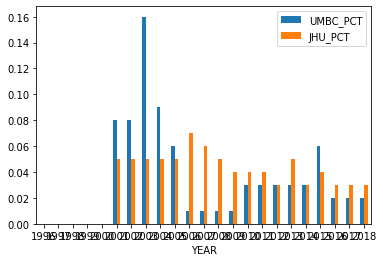

In [105]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)

df_combine.plot.bar(x='YEAR', y=['UMBC_PCT','JHU_PCT'],rot=0)

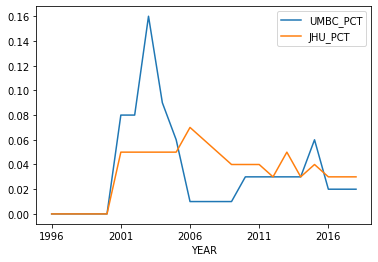

In [106]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)
df_combine.plot.line(x='YEAR', y=['UMBC_PCT','JHU_PCT'],rot=0)


## Question 19

In [107]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

Based on my obsercation of the plots, both UMBC and Johns Hopkins have slowly decreased their in-state tuition and then steadied out. The average tuition in the past few years, has stayed approximately the same and there has not been a lot of change.

In [ ]:
# The end.